** Гипотеза 1**.
 "Мужчины пропускают в течение года более 2 рабочих дней по болезни значимо чаще женщин". 

In [1]:
import pandas as pd
import matplotlib
%matplotlib inline
import seaborn as sb

df = pd.read_csv('../input/data1.csv', encoding="windows-1251")
# df.rename(columns = {'Количество больничных дней': 'Sick leaves', 'Возраст': 'Age', 'Пол': 'Gender' }, inplace = True)
df.head()

,Количество больничных дней,Возраст,Пол
0,5,39,Ж
1,4,54,М
2,4,26,М
3,5,42,М
4,4,29,М


In [2]:
# Distribution of males and females differ from each other in the dataset
print(df['Пол'].value_counts())

М    139
Ж     98
Name: Пол, dtype: int64


In [3]:
# First off we need to conduct a simple Random Sampling to equalize amount of males and females in number. 
males = df[df['Пол']=='М'].sample(98)
females = df[df['Пол']=='Ж']
frames = [males, females]
people = pd.concat(frames)
print (people.shape)

(196, 3)


Ж    67
М    55
Name: Пол, dtype: int64


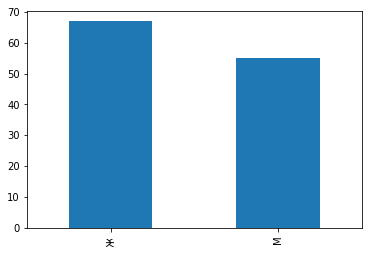

In [4]:
# Curiously enough, according to the following histogram, it is actually females who exceed males in the frequency of over 2 sick leaves.
# However, according to the T-test in the following cells, the histogram cannot be proved statistically.
data = people[people['Количество больничных дней']>2]
data['Пол'].value_counts().plot.bar()
print(data['Пол'].value_counts())

In [5]:
# We don`t observe any outliers
data.groupby(['Пол']).describe()

Возраст                                                     \
      count       mean       std   min   25%   50%   75%   max   
Пол                                                              
Ж      67.0  40.029851  6.457249  23.0  36.0  40.0  44.5  55.0   
М      55.0  40.072727  6.716080  23.0  36.0  42.0  45.0  52.0   

    Количество больничных дней                                               
                         count      mean       std  min  25%  50%  75%  max  
Пол                                                                          
Ж                         67.0  4.238806  1.268375  3.0  3.0  4.0  5.0  8.0  
М                         55.0  4.309091  1.538069  3.0  3.0  4.0  5.0  8.0

**According to Fisher`s exact test, given such a great p-value we cannot reject the null hypothesis

Hence, the hypothesis that Males more often have 2 Sick leaves than females cannot be supported.**

In [7]:
'''
H0: Males do not have 2 Sick leaves more often than females.
H1: Males more often have 2 Sick leaves than females.
'''
import scipy.stats as stats
oddsratio, pvalue = stats.fisher_exact([[67, 55], [61, 43]])
pvalue

0.59248987708818834

In [8]:
'''Alternative method using T-test for a new hypothesis.'''
people.groupby(['Пол']).describe()

Возраст                                                     \
      count       mean       std   min   25%   50%   75%   max   
Пол                                                              
Ж      98.0  40.581633  6.999151  23.0  36.0  41.0  45.0  60.0   
М      98.0  39.846939  6.593267  23.0  36.0  41.0  44.0  53.0   

    Количество больничных дней                                               
                         count      mean       std  min  25%  50%  75%  max  
Пол                                                                          
Ж                         98.0  3.367347  1.689188  0.0  2.0  3.0  4.0  8.0  
М                         98.0  3.051020  1.896130  0.0  2.0  3.0  4.0  8.0

In [9]:
males_days = males['Количество больничных дней']
females_days = females['Количество больничных дней']

In [10]:
'''We can`t reject null hypothesis of equal means, as T-test supports Fisher`s exact test findings in seeing no significant difference 
between male and female groups on the amount of 'Sick leaves'.'''
from scipy import stats
stats.ttest_ind(males_days, females_days)

Ttest_indResult(statistic=-1.2331439636841741, pvalue=0.21901415858249168)

**Гипотеза 2.**
"Работники старше 35 лет пропускают в течение года более 2 рабочих дней по болезни значимо чаще своих более молодых коллег".

In [12]:
# Number of people under 35 years of age
df[df['Возраст']<35]['Возраст'].count()

46

In [14]:
# Random Sampling to equalize amount of males and females in number. 
old = df[df['Возраст']>35].sample(46)
young = df[df['Возраст']<35]
values = [old, young]
results = pd.concat(values)

In [16]:
print(old[old['Количество больничных дней']>2]['Количество больничных дней'].count())
print(young[young['Количество больничных дней']>2]['Количество больничных дней'].count())

26
31


According to Fisher`s exact test, given such a high p-value, we cannot reject the null hypothesis.
Hence the alternative hyporthesis that employees over 35 years of age have a higher frequency of 
having more than 2 sick leaves than their younger colleagues can be rejected.

In [18]:
'''
H0: Employees over 35 years of age do not differ in the frequency of having more than 2 sick leaves than their younger colleagues. 
H1: Employees over 35 years of age have a higher frequency of having more than 2 sick leaves than their younger colleagues.
'''
odds, p_value = stats.fisher_exact([[26, 20], [31, 14]])
p_value

0.28010813291917058